In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")
data = pd.concat([train, test])

In [3]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

In [4]:
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

In [5]:
data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day

In [6]:
data.drop(['trans_date_trans_time', 'dob', 'first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

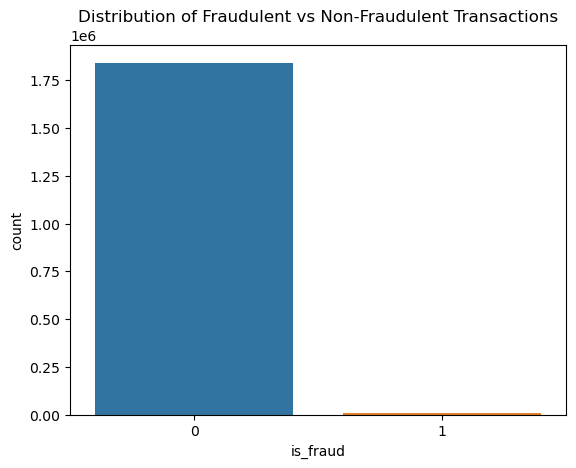

In [7]:
sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

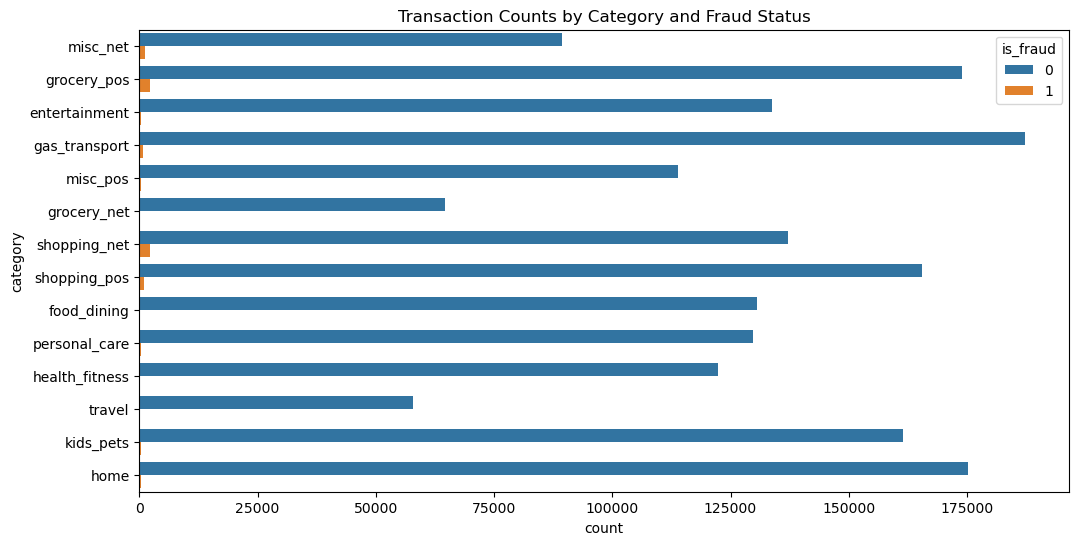

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

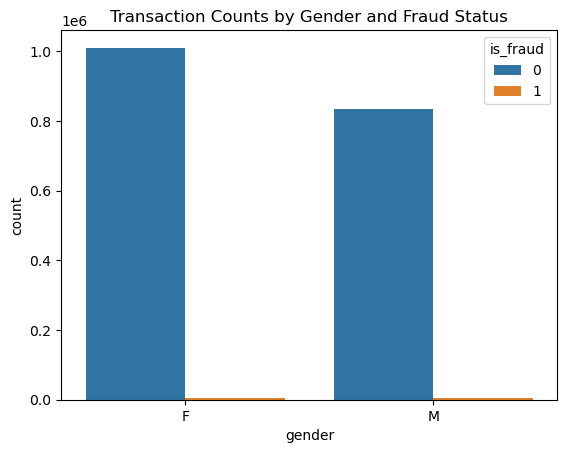

In [11]:
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

C:\Users\vaish\AppData\Local\Temp\ipykernel_13984\2381420747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues')


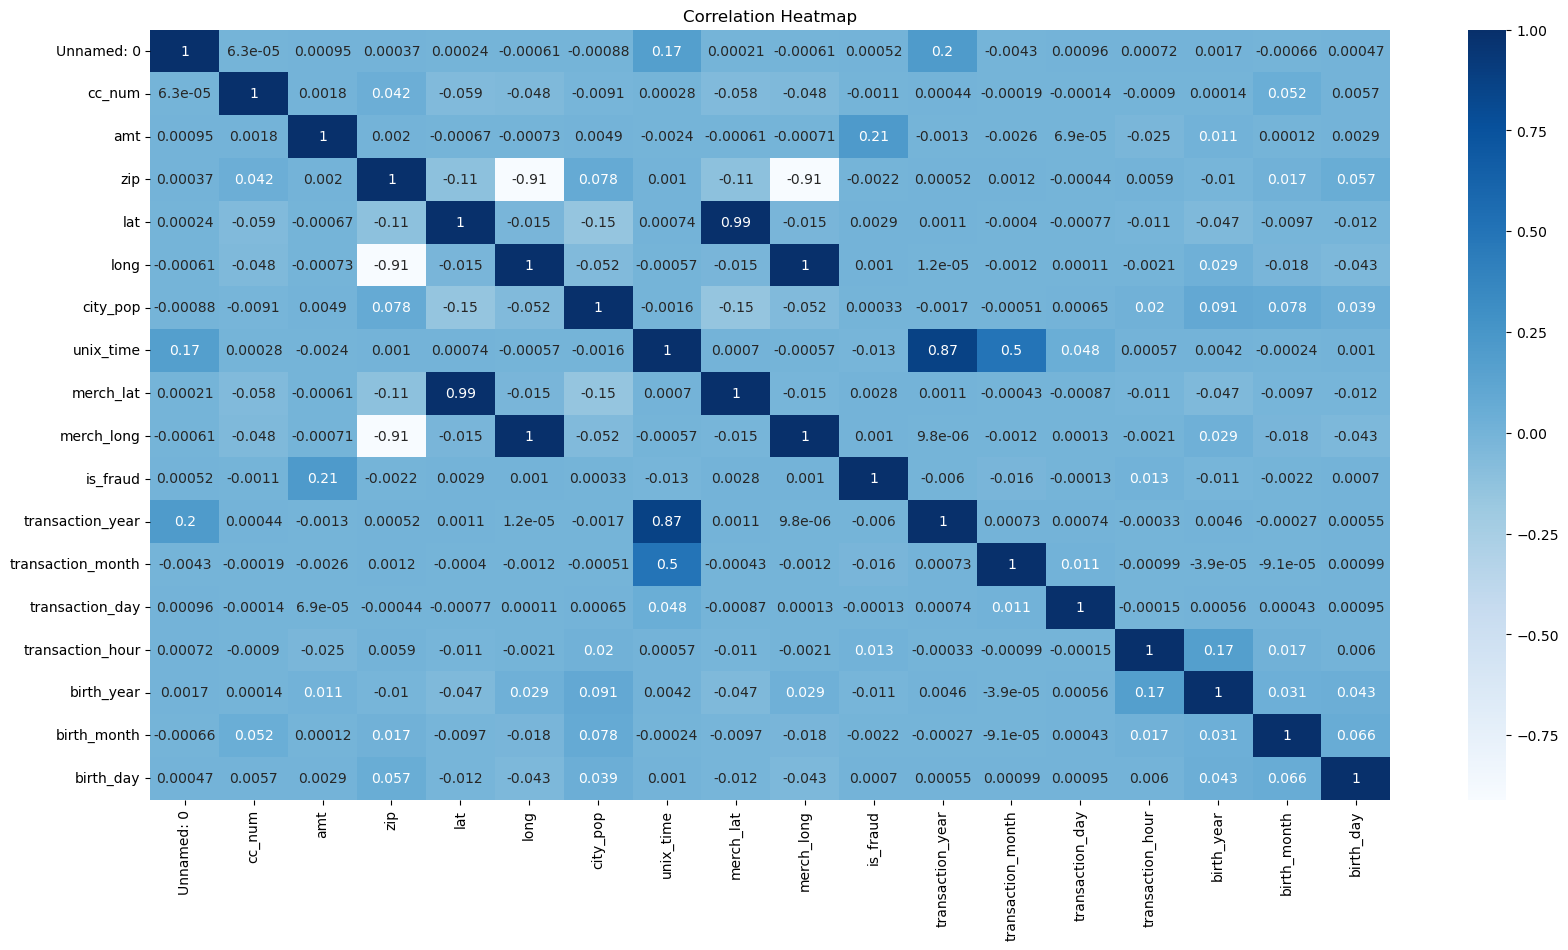

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('is_fraud', axis=1))
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['is_fraud'], test_size=0.2, random_state=42)


In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368368    158]
 [  1953      0]]
Accuracy: 0.9943019712318377


In [28]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print("\nDecision Tree Results:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.80      0.84      0.82      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479

[[368108    418]
 [   309   1644]]
Accuracy: 0.9980376755497613


In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.98      0.74      0.84      1953

    accuracy                           1.00    370479
   macro avg       0.99      0.87      0.92    370479
weighted avg       1.00      1.00      1.00    370479

[[368498     28]
 [   507   1446]]
Accuracy: 0.9985559235476235
